In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Desafío 1. Importe un csv desde internet

In [2]:
df = pd.read_csv('subsample_VM_demo.csv')

In [3]:
df.head()

Unnamed: 0  undp_hdi ccodealp   ht_region   gle_cgdpc     imf_pop  ffp_hf  \
0          85     0.902      JPN    EastAsia  36123.7700  127.120003     2.6   
1         191     0.702      WSM     Pacific   3167.7500    0.192000     8.9   
2         147     0.720      VCT   Caribbean   7454.8799    0.110000     NaN   
3          74     0.834      HUN  EastEurope  18310.8110    9.877000     3.3   
4         120     0.555      NPL   SouthAsia   1462.0800   28.174999     7.0   

    wef_qes  wdi_expedu   wdi_ners  
0  4.430102     3.59184  99.042671  
1       NaN         NaN  79.545982  
2       NaN         NaN        NaN  
3  3.289020     4.65935  92.195374  
4  3.591811     3.98130  59.679131

### Desafío 2. Importe su conjunto de funciones

In [4]:
import ancilliary_funcs as af

In [5]:
for i in list(df): 
    valor, porcentaje = af.obs_perdidas(df, i)
    print("La variable {} tiene {} observaciones perdidas lo que equivale al {}%".format(i, valor, round(porcentaje,3)*100))

La variable Unnamed: 0 tiene 0 observaciones perdidas lo que equivale al 0.0%
La variable undp_hdi tiene 4 observaciones perdidas lo que equivale al 4.1000000000000005%
La variable ccodealp tiene 0 observaciones perdidas lo que equivale al 0.0%
La variable ht_region tiene 0 observaciones perdidas lo que equivale al 0.0%
La variable gle_cgdpc tiene 2 observaciones perdidas lo que equivale al 2.1%
La variable imf_pop tiene 28 observaciones perdidas lo que equivale al 28.9%
La variable ffp_hf tiene 9 observaciones perdidas lo que equivale al 9.3%
La variable wef_qes tiene 25 observaciones perdidas lo que equivale al 25.8%
La variable wdi_expedu tiene 25 observaciones perdidas lo que equivale al 25.8%
La variable wdi_ners tiene 35 observaciones perdidas lo que equivale al 36.1%


### Desafío 3. Estime el puntaje Z

Genere una nueva columna en la tabla de datos mediante funciones vectorizadas.

In [6]:
# La variable con menor cantidad de casos perdidos es gle_cgdpc

df['gle_cgdpc_zscore'] = (df['gle_cgdpc'] - df['gle_cgdpc'].mean())/df['gle_cgdpc'].std()

In [7]:
df.head()

Unnamed: 0  undp_hdi ccodealp   ht_region   gle_cgdpc     imf_pop  ffp_hf  \
0          85     0.902      JPN    EastAsia  36123.7700  127.120003     2.6   
1         191     0.702      WSM     Pacific   3167.7500    0.192000     8.9   
2         147     0.720      VCT   Caribbean   7454.8799    0.110000     NaN   
3          74     0.834      HUN  EastEurope  18310.8110    9.877000     3.3   
4         120     0.555      NPL   SouthAsia   1462.0800   28.174999     7.0   

    wef_qes  wdi_expedu   wdi_ners  gle_cgdpc_zscore  
0  4.430102     3.59184  99.042671          1.188021  
1       NaN         NaN  79.545982         -0.590326  
2       NaN         NaN        NaN         -0.358988  
3  3.289020     4.65935  92.195374          0.226812  
4  3.591811     3.98130  59.679131         -0.682366

In [8]:
#Ordenar valores
df_sort = df.sort_values('gle_cgdpc_zscore')

In [9]:
#Elimino valores perdidos
df_final = df_sort.dropna(subset=['gle_cgdpc'])

In [10]:
df_final.head(10)

Unnamed: 0  undp_hdi ccodealp    ht_region   gle_cgdpc  imf_pop  ffp_hf  \
12          97     0.427      LBR  SubSaharian   488.26999      NaN     6.6   
39         125     0.351      NER  SubSaharian   644.53998      NaN     6.9   
83          26     0.406      BDI  SubSaharian   663.57001      NaN     6.8   
77          32     0.347      CAF  SubSaharian   690.03998      NaN     6.9   
92         102     0.511      MDG  SubSaharian   822.62000      NaN     6.1   
50         116     0.414      MOZ  SubSaharian   852.39001   25.733     7.4   
47          54     0.441      ETH  SubSaharian   900.77002   88.347     7.0   
84         139     0.421      GNB  SubSaharian   961.26001      NaN     8.5   
11         154     0.431      SLE  SubSaharian   979.95001    6.232     8.4   
32         172     0.484      TGO  SubSaharian  1036.28000    6.929     7.3   

     wef_qes  wdi_expedu   wdi_ners  gle_cgdpc_zscore  
12  3.472222     2.75756        NaN         -0.734914  
39       NaN     6.70941  15.665040         -0.726482  
83  2.595249     5.41642  24.948179         -0.725455  
77       NaN     1.22393  13.600750         -0.724027  
92  2.968793     2.08204  31.080410         -0.716873  
50  2.770460     6.48322  19.439980         -0.715266  
47  3.599252     4.50051  30.274250         -0.712655  
84       NaN     2.17313        NaN         -0.709391  
11  2.986086     2.66167        NaN         -0.708383  
32       NaN     4.86846        NaN         -0.705343

In [11]:
df_final.tail(10)

Unnamed: 0  undp_hdi ccodealp      ht_region   gle_cgdpc    imf_pop  \
89          58     0.893      FIN     WesternDem   36958.211   5.427000   
56           8     0.937      AUS     WesternDem   38611.949  23.621000   
42         167     0.909      SWE     WesternDem   39000.910   9.645000   
80          64     0.924      DEU     WesternDem   39486.699  80.983002   
90         121     0.923      NLD     WesternDem   42258.352  16.865000   
72         148       NaN      SMR     WesternDem   42664.211   0.034000   
70          23     0.864      BRN  SouthEastAsia   46103.840   0.412000   
41         168     0.938      CHE     WesternDem   50454.410   8.140000   
14          99     0.911      LIE     WesternDem  102243.520        NaN   
35         111       NaN      MCO     WesternDem  108481.130        NaN   

    ffp_hf   wef_qes  wdi_expedu   wdi_ners  gle_cgdpc_zscore  
89     2.3  5.859115     7.16810  94.003181          1.233049  
56     1.0  4.798969     5.22534  87.572853          1.322286  
42     1.5  4.577006     7.67509  96.651558          1.343275  
80     2.1  5.241914     4.95219        NaN          1.369489  
90     2.6  5.304531     5.52938  93.882019          1.519051  
72     NaN       NaN     2.38373        NaN          1.540952  
70     4.6  4.417221     3.35319  87.032318          1.726558  
41     2.1  5.986858     5.09608  84.246483          1.961320  
14     NaN       NaN     2.55604  91.538719          4.755925  
35     NaN       NaN     1.02195        NaN          5.092514

### Desafío 4. Estime el puntaje z de las regiones

In [12]:
def graph_dot(sample_df, plot_var, plot_by, global_stat=False, statistic='zscore'):
    
    sub_df = sample_df.loc[:,[plot_var, plot_by]]
    sub_df[plot_var+'_zscore'] = (sub_df[plot_var] - sub_df[plot_var].mean())/sub_df[plot_var].std()
    sub_df = sub_df.sort_values(plot_var+'_zscore')
    sub_df = sub_df.dropna(subset=[plot_var])
    
    group_mean = sub_df.groupby(plot_by)[plot_var].mean()
    group_median = sub_df.groupby(plot_by)[plot_var].median()
    group_zscore = sub_df.groupby(plot_by)[plot_var+'_zscore'].mean()
    
    sub_media = round(sub_df[plot_var].mean(),3)
    sub_median = round(sub_df[plot_var].median(),3)
    
    plt.figure(figsize=(10,8))
    plt.xlabel(plot_var)
    plt.ylabel(plot_by)
    
    if statistic=='mean':
        plt.suptitle("Media")
        plt.title("La media de la muestra es {}".format(sub_media))
        plt.plot(group_mean.values, group_mean.index, 'o', color = 'skyblue')
        plt.axvline(sub_media, color = 'tomato', linestyle = '--')
        limit = group_mean.values.max()
    elif statistic=='median':
        plt.suptitle('Mediana')
        plt.title("La mediana de la muestra es {}".format(sub_median))
        plt.plot(group_median.values, group_median.index, 'o', color = 'darkseagreen')
        plt.axvline(sub_median, color = 'blue', linestyle = '--')
        limit = group_median.values.max()
    elif statistic=='zscore':
        plt.title('Z Score')
        plt.xlabel(plot_var+'_zscore')
        plt.plot(group_zscore.values, group_zscore.index, 'o', color = 'darkgreen')
        plt.axvline(sub_df[plot_var+'_zscore'].mean(), color = 'crimson', linestyle = '--')
        limit = group_zscore.values.max()
        
    plt.xlim(-limit*1.08,limit*1.08)
    
    if global_stat:
        plt.title("La media de la base completa es {}".format(round(df[plot_var].mean(),3)))
        plt.axvline(df[plot_var].mean(), color = 'green', linestyle = '--')

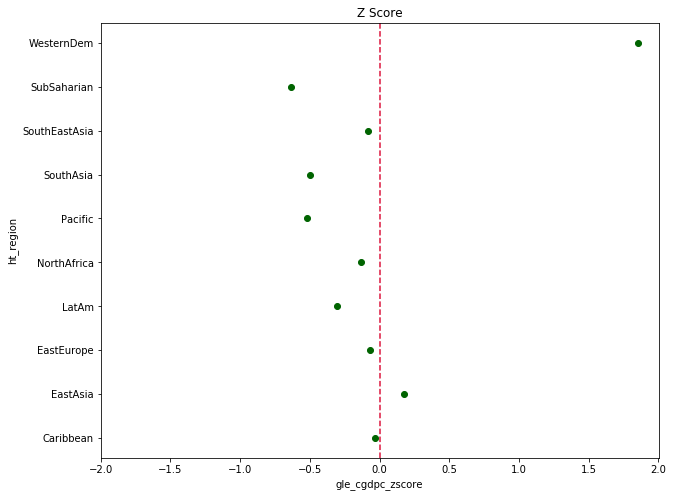

In [13]:
graph_dot(df, 'gle_cgdpc', 'ht_region')

### Desafío 5. Genere un método que devuelva un gráfico comparando dos curvas de densidad

In [14]:
#importo dos dataframes
df1 = pd.read_csv('subsample_VM_demo.csv')
df1.head()

Unnamed: 0  undp_hdi ccodealp   ht_region   gle_cgdpc     imf_pop  ffp_hf  \
0          85     0.902      JPN    EastAsia  36123.7700  127.120003     2.6   
1         191     0.702      WSM     Pacific   3167.7500    0.192000     8.9   
2         147     0.720      VCT   Caribbean   7454.8799    0.110000     NaN   
3          74     0.834      HUN  EastEurope  18310.8110    9.877000     3.3   
4         120     0.555      NPL   SouthAsia   1462.0800   28.174999     7.0   

    wef_qes  wdi_expedu   wdi_ners  
0  4.430102     3.59184  99.042671  
1       NaN         NaN  79.545982  
2       NaN         NaN        NaN  
3  3.289020     4.65935  92.195374  
4  3.591811     3.98130  59.679131

In [15]:
df2 = pd.read_csv('subsample_hz_demo.csv')
df2.head()

Unnamed: 0    cname  undp_hdi ccodealp  ht_region   gle_cgdpc    imf_pop  \
0           3  Andorra     0.857      AND          5  32367.3300        NaN   
1          79     Iraq     0.649      IRQ          3   4178.2598  32.577999   
2         181  Ukraine     0.748      UKR          1   9326.7197  42.759998   
3         177   Turkey     0.764      TUR          3  16900.7110  77.695999   
4         115  Morocco     0.645      MAR          3   3999.5601  33.179001   

   wef_imort  who_alc2000   who_tobt  wdi_exph ht_region_desc  
0        NaN     9.979999  33.099998  8.127135     WesternDem  
1        NaN     0.170000        NaN  5.538873    NorthAfrica  
2   9.200000     8.060000  30.700001  7.095736     EastEurope  
3  12.200000     1.450000  27.000000  5.414959    NorthAfrica  
4  26.799999     0.430000  22.000000  5.907778    NorthAfrica

In [182]:
def graph_comp(df1, df2, variable, log=False):
    #plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn 
    #plt.rcParams["figure.figsize"] = (15, 6) # Tamaño gráficos
    
    #Limpio la data solo sobre la variable que indico
    df1 = df1.dropna(subset=[variable])
    df2 = df2.dropna(subset=[variable])
    
    #Media
    media_1 = df1[variable].mean()
    media_2 = df2[variable].mean()
    
    #Varianza
    var_1 = df1[variable].var()
    var_2 = df2[variable].var()
    
    #Iteraciones
    i = 1000
    
    #Tamaño gráfico
    plt.figure(figsize=(16,12))
    
    #Muestra 1
    plt.subplot(3,3,1)
    plt.title('Muestra 1')
    #Histograma
    plt.hist(df1[variable], color='goldenrod', alpha=.4)
    
    r = plt.hist(df1[variable], color='goldenrod', alpha=.4)
    altura = r[0].max()
    
    _, lmax = plt.xlim()
    ancho = media_1 + ((lmax - media_1)/8)
    
    plt.axvline(media_1, color='goldenrod', linestyle='--', lw=2)
    plt.text(ancho, altura/2, f'$\mu_1={round(media_1,3)}$\n $\sigma_1={round(var_1,3)}$')
    plt.xlabel(f'{variable}')
    plt.ylabel('Frecuencia')
    
    #Muestra 2
    plt.subplot(3,3,2)
    plt.title('Muestra 2')
    #Histograma
    plt.hist(df2[variable], color='darkseagreen', alpha=.4)
    
    r = plt.hist(df2[variable], color='darkseagreen', alpha=.4)
    altura = r[0].max()
    
    _, lmax = plt.xlim()
    ancho = media_2 + ((lmax - media_2)/8)
    
    plt.axvline(media_2, color='darkseagreen', linestyle='--', lw=2)
    plt.text(ancho, altura/2, f'$\mu_2={round(media_2,3)}$\n $\sigma_2={round(var_2,3)}$')
    plt.xlabel(f'{variable}')
    plt.ylabel('Frecuencia')
    
    #Muestra 1 & 2
    plt.subplot(3,3,3)
    plt.title('Comparación')
    
    #Histograma
    plt.hist(df2[variable], color='olivedrab', alpha=.5)
    plt.hist(df1[variable], color='goldenrod', alpha=.5)
    
    r = plt.hist(df2[variable], color='olivedrab', alpha=.5)
    s = plt.hist(df1[variable], color='goldenrod', alpha=.5)
    altura = (r[0].max() + s[0].max())/2
    
    _, lmax = plt.xlim()
    ancho = ((media_1+media_2)*.5) + ((lmax - ((media_1+media_2)*.5))/8)
    
    plt.axvline(media_1, color='darkgoldenrod', linestyle='--', lw=1)
    plt.axvline(media_2, color='darkolivegreen', linestyle='--', lw=1)
    plt.text(ancho, altura*(3/4), f'$\mu_1={round(media_1,3)}$\n $\sigma_1={round(var_1,3)}$')
    plt.text(ancho, altura*(1/4), f'$\mu_2={round(media_2,3)}$\n $\sigma_1={round(var_2,3)}$')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    #Simulated 1
    plt.subplot(3,3,4)
    sim_1 = np.random.normal(media_1, np.sqrt(var_1), i)
    plt.hist(sim_1, color='royalblue', alpha=.5, density=True)
    #plt.axvline(media_1, color='darkblue', linestyle='--', lw=1)
    
    plt.xlabel(f'norm {variable}')
    plt.ylabel('Frecuencia')
    
    #Curva 1
    dmin1, dmax1 = plt.xlim()
    x1 = np.linspace(dmin1, dmax1, i)
    sim_pdf1 = stats.norm.pdf(x1, media_1, np.sqrt(var_1))
    plt.plot(x1, sim_pdf1, color='darkblue', lw=1)
    
    #Simulated 2
    plt.subplot(3,3,5)
    sim_2 = np.random.normal(media_2, np.sqrt(var_2), i)
    plt.hist(sim_2, color='skyblue', alpha=.5, density=True)
    #plt.axvline(media_2, color='skyblue', linestyle='--', lw=1)
    
    plt.xlabel(f'norm {variable}')
    plt.ylabel('Frecuencia')
    
    #Curva 2
    dmin2, dmax2 = plt.xlim()
    x2 = np.linspace(dmin2, dmax2, i)
    sim_pdf2 = stats.norm.pdf(x2, media_2, np.sqrt(var_2))
    plt.plot(x2, sim_pdf2, color='skyblue', lw=1)
    
    #Simulated 1&2
    plt.subplot(3,3,6)
    plt.hist(sim_1, color='royalblue', alpha=.5, density=True)
    plt.hist(sim_2, color='skyblue', alpha=.5, density=True)
    plt.plot(x1, sim_pdf1, color='darkblue', lw=1)
    plt.plot(x2, sim_pdf2, color='skyblue', lw=1)
    
    plt.xlabel(f'norm {variable}')
    plt.ylabel('Frecuencia')
    
    if log:
        plt.subplot(3,3,7)
        plt.hist(np.log(df1[variable]), color='coral', alpha=.5)
        plt.xlabel(f'log({variable})')
        plt.ylabel('Frecuencia')
        
        plt.subplot(3,3,8)
        plt.hist(np.log(df2[variable]), color='orange', alpha=.5)
        plt.xlabel(f'log({variable})')
        plt.ylabel('Frecuencia')
        
        plt.subplot(3,3,9)
        plt.hist(np.log(df1[variable]), color='coral', alpha=.5)
        plt.hist(np.log(df2[variable]), color='orange', alpha=.5)
        plt.xlabel(f'log({variable})')
        plt.ylabel('Frecuencia')

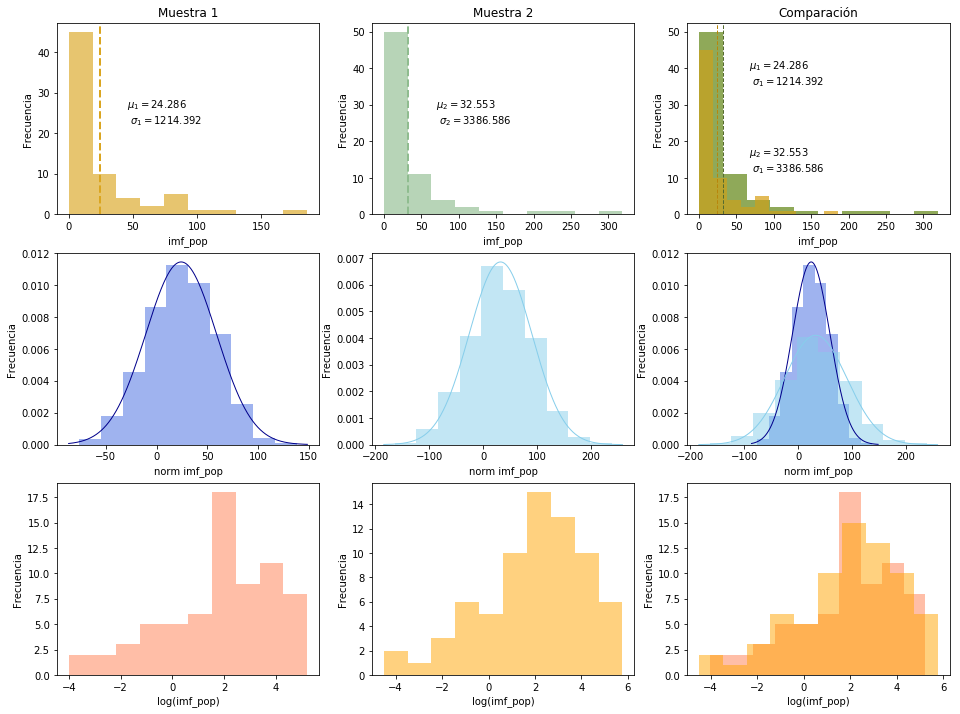

In [183]:
#imf_pop
graph_comp(df1, df2, 'imf_pop', log=True)

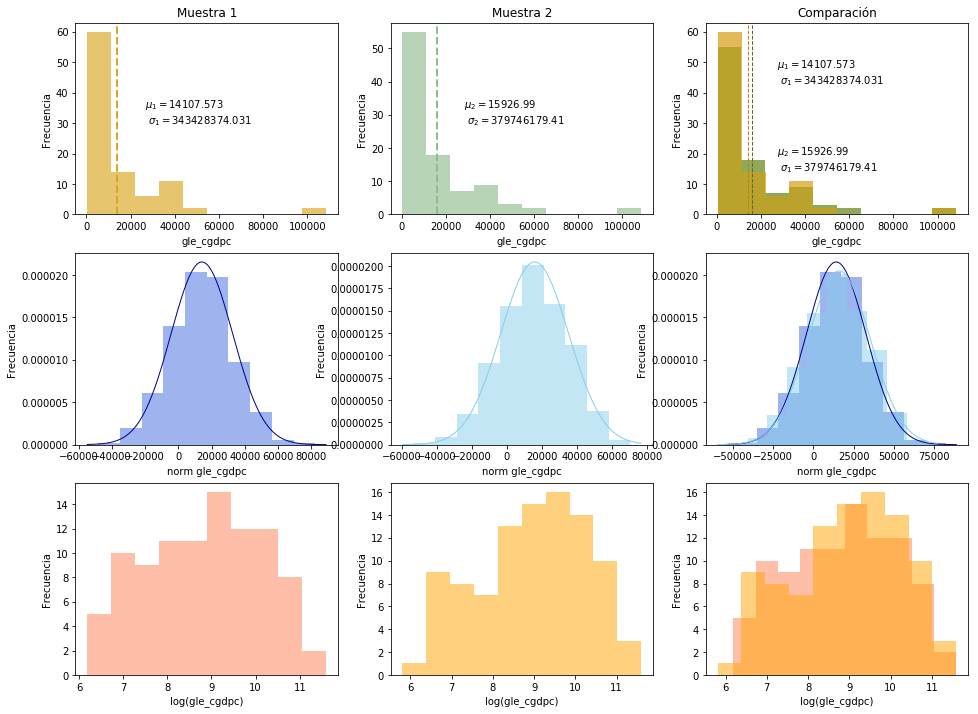

In [184]:
#gle_cgdpc
graph_comp(df1, df2, 'gle_cgdpc', log=True)

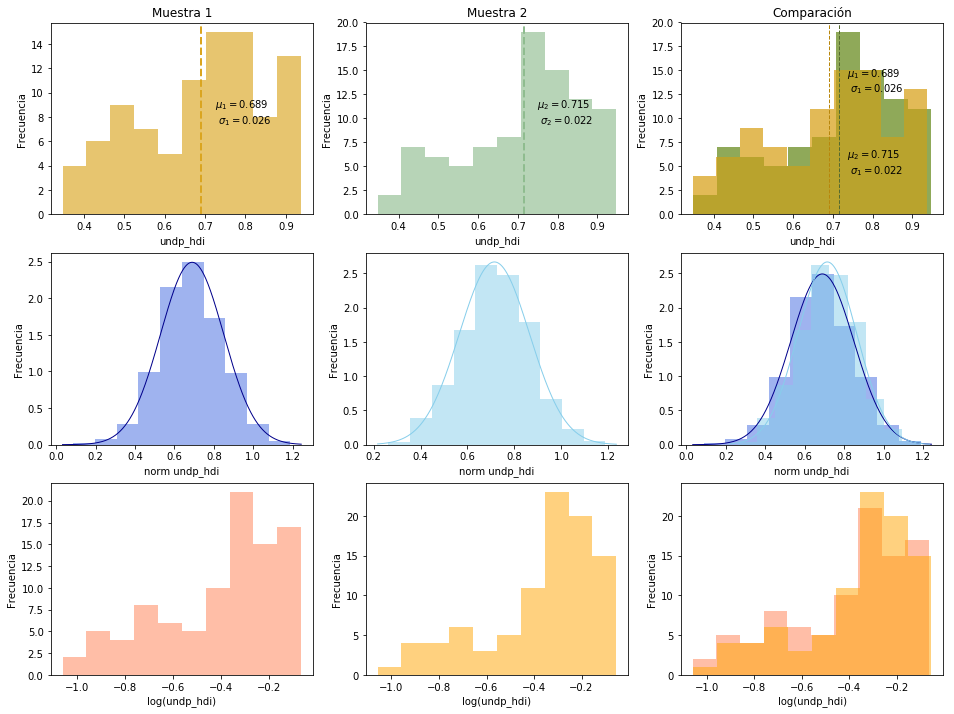

In [185]:
#undp_hdi
graph_comp(df1, df2, 'undp_hdi', log=True)

### Grafique las curvas para imf_pop , gle_cgdpc y undp_hdi . ¿En qué casos es necesario utilizar logaritmos? ¿Por qué?

Según los resultados, se ve que en 'imf_pop' y 'gle_cgdpc' las distribuciones no son normales. Por lo que se puede aplicar logaritmo para "normalizarla". Sin embargo, la variable 'undp_hdi' sigue una distribución que se asemeja a una distribución normal, entonces no sería necesario normalizarla a través de la función logarítmica.
